<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/03_classification_using_NN_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What are we going to cover in this nb:
* Architecture of a classification model
* Input shapes and output shapes
1. X: features/data (inputs)
2. y: labels (outputs)
    *  "What class do the inputs belong to?"
* Creating custom data to view and fit
* Steps in modelling for binary and mutliclass classification
    * Creating a model
    * Compiling a model
        * Defining a loss function
        * Setting up an optimizer
            * Finding the best learning rate
        * Creating evaluation metrics
    * Fitting a model (getting it to find patterns in our data)
    * Improving a model
* The power of non-linearity
* Evaluating classification models
    * Visualizng the model ("visualize, visualize, visualize")
    * Looking at training curves
    * Compare predictions to ground truth (using our evaluation metrics)

**NOTE:**
**Output Activation: sigmoid used for Binary Classification, while Softmax is used for Multiclass Classification,**

**Loss function: Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow) for Binary Classification, Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow) for Multiclass Classification**

**Output shape: 1 output for Binary classification,
Tensor of output classes where O(i) = prob. of output being class i for multiclass classification**

### Architecture of a classification model

Input Layer
hidden layer
Output Layer

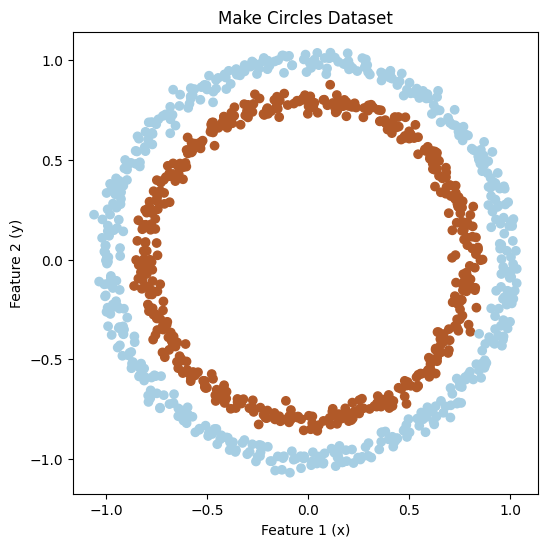

In [110]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

n_samples = 1000

# X, y = make_circles(n_samples,
#                     noise=0.05, factor=0.6, # radius of inner circle = factor * radius of outer circle
#                     random_state=42)

# radius of inner circle = factor * radius of outer circle
X, y = make_circles(n_samples, noise=0.03, random_state = 42)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Make Circles Dataset")
plt.xlabel("Feature 1 (x)")

plt.ylabel("Feature 2 (y)")
plt.show()

In [111]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [112]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

###Making dataset in pandas

In [113]:
import pandas as pd
df = pd.DataFrame({"X0": X[:,0],"X1": X[:,1],"y": y})

In [114]:
df

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [115]:
df.y.value_counts()

,count
y,
1,500
0,500


In [116]:
X.shape,y.shape #y is scalar for each data sample

((1000, 2), (1000,))

In [117]:
X.size #returns totalnumber of values contained in it

2000

In [118]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Creating the model, fitting it and evaluating it

In [120]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy']) # accuracy = how many labels were correctly predicted

model_1.fit(X_train, y_train,  epochs = 50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5097 - loss: 0.7006   
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5009 - loss: 0.6997  
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5021 - loss: 0.6991 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5039 - loss: 0.6986 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4976 - loss: 0.6981 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4963 - loss: 0.6977 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4929 - loss: 0.6973 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4924 - loss: 0.6970 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4930 - loss: 0.6967 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4897 - loss: 0.6965 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4926 - loss: 0.6962 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac


### Improving the model: new model with an additional dense layer

In [121]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5114 - loss: 0.6928   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5114 - loss: 0.6926 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5112 - loss: 0.6924 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5112 - loss: 0.6923 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5112 - loss: 0.6921 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5112 - loss: 0.6919  
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5112 - loss: 0.6917 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5109 - loss: 0.6915 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5109 - loss: 0.6913 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5126 - loss: 0.6912 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5139 - loss: 0.6910  
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [122]:
model_2.evaluate(X, y) #returns loss and metrics

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7679 - loss: 0.6708  


[0.6701646447181702, 0.7699999809265137]

### Changing the activation function

In [202]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.Input(shape = (2,)), #input layer
  tf.keras.layers.Dense(16, activation = 'tanh'), #hidden layers
  tf.keras.layers.Dense(4, activation = 'tanh'),
  tf.keras.layers.Dense(1, activation = 'sigmoid') # activation fn in output : sigmoid for binary classification
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_3.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5152 - loss: 0.7092   
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5126 - loss: 0.7036 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5066 - loss: 0.6997
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5003 - loss: 0.6972 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4942 - loss: 0.6955
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5020 - loss: 0.6944
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4931 - loss: 0.6936 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5065 - loss: 0.6932 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5170 - loss: 0.6929 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5159 - loss: 0.6927 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5330 - loss: 0.6925 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0

In [203]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6176 - loss: 0.6898  


[0.6905526518821716, 0.6019999980926514]

**doesn't work well**

### visualizing the model: seeing its decision boundary so as to see if it is going wrong

In [189]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.6)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


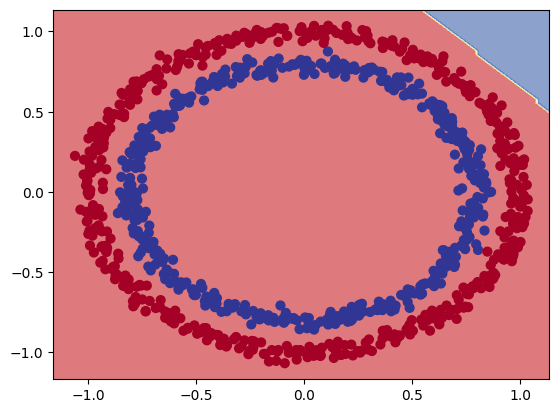

In [190]:
plot_decision_boundary(model_1, X, y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


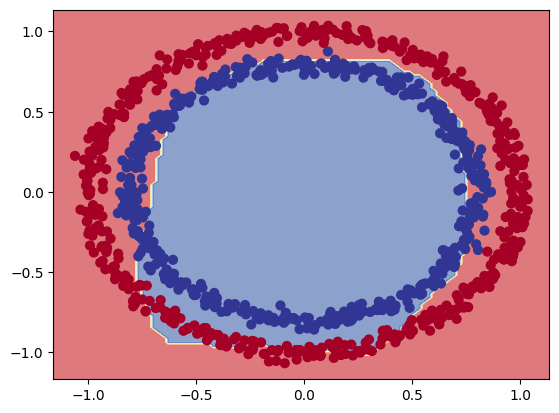

In [191]:
plot_decision_boundary(model_2, X, y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


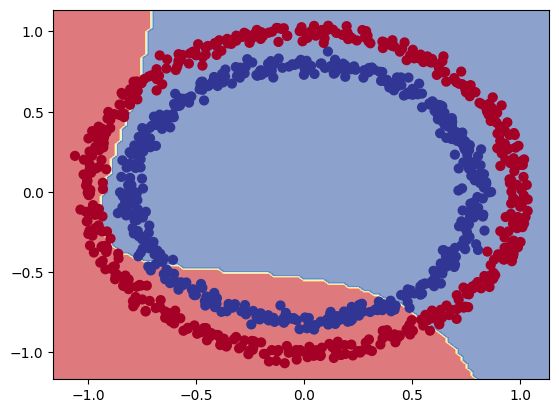

In [204]:
plot_decision_boundary(model_3, X, y)

Note: here the model has learnt a linear function/curve but the problem is that these are not seperable by a straight line

#### TRYING OUT A SIMPLER MODEL as model_3 is overcomplicating the decision boundary

In [193]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Input(shape = (2,)),
  tf.keras.layers.Dense(3, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.03),
                metrics=["accuracy"])

history = model_4.fit(X_train, y_train, epochs=100)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 4.3424   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5054 - loss: 5.7539 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5490 - loss: 1.2009  
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5908 - loss: 0.6751 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5913 - loss: 0.6730 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5964 - loss: 0.6716 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6005 - loss: 0.6703 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6046 - loss: 0.6689 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6068 - loss: 0.6676 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6085 - loss: 0.6662 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6123 - loss: 0.6648 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


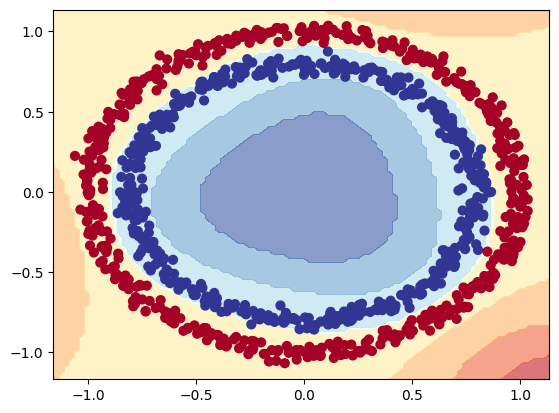

In [194]:
plot_decision_boundary(model_4, X, y)

In [195]:
model_4.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9929 - loss: 0.1773  


[0.17423774302005768, 0.9940000176429749]

Text(0.5, 1.0, 'model 5 training curves')

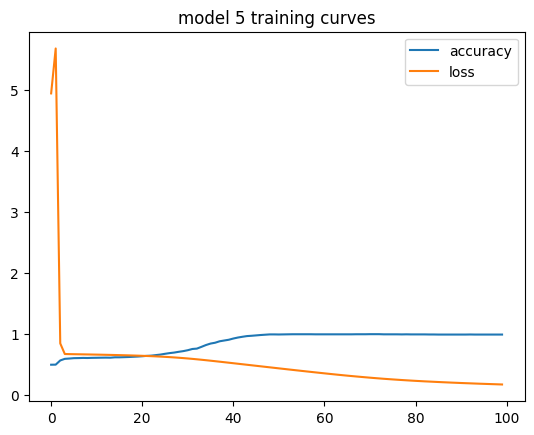

In [196]:
pd.DataFrame(history.history).plot()
plt.title("model 5 training curves")

**Note: changing the activation functions in output layer is important, like in classification its better to have sigmoid/tanh/softmax activation functions**

In [197]:
model_1.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12 (52.00 B)

In [198]:
model_1.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.49961355],
       [0.499

In [199]:
model_2.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.50398517],
       [0.48049256],
       [0.50724673],
       [0.4761434 ],
       [0.50871634],
       [0.50107205],
       [0.4769844 ],
       [0.46054032],
       [0.5000748 ],
       [0.47885764],
       [0.4847044 ],
       [0.5098467 ],
       [0.46383634],
       [0.5207449 ],
       [0.47527188],
       [0.49757257],
       [0.5150332 ],
       [0.47389317],
       [0.50153625],
       [0.4701808 ],
       [0.47672096],
       [0.46316573],
       [0.49504215],
       [0.4646486 ],
       [0.48907056],
       [0.47510198],
       [0.49924305],
       [0.4839905 ],
       [0.46341458],
       [0.5312962 ],
       [0.5085608 ],
       [0.48761666],
       [0.48249573],
       [0.5138846 ],
       [0.47513542],
       [0.50635433],
       [0.49474448],
       [0.51683086],
       [0.5115434 ],
       [0.5279259 ],
       [0.48910823],
       [0.48930952],
       [0.516628  ],
       [0.5005244 ],
       [0.47586238],
       [0.5063232 ],
       [0.49603224],
       [0.471

In [200]:
model_3.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[0.51470876],
       [0.51581347],
       [0.4978594 ],
       [0.51450914],
       [0.49820238],
       [0.50043154],
       [0.5139906 ],
       [0.50896466],
       [0.49727005],
       [0.51588356],
       [0.5135067 ],
       [0.5157001 ],
       [0.51142585],
       [0.49334893],
       [0.49441844],
       [0.5065487 ],
       [0.51568127],
       [0.51016295],
       [0.5119516 ],
       [0.5061015 ],
       [0.51573664],
       [0.5035993 ],
       [0.5097868 ],
       [0.50634754],
       [0.5160699 ],
       [0.5115822 ],
       [0.48759702],
       [0.5001886 ],
       [0.4924707 ],
       [0.4949785 ],
       [0.5136903 ],
       [0.5164855 ],
       [0.51402026],
       [0.49595797],
       [0.51293504],
       [0.5161426 ],
       [0.51521355],
       [0.49425957],
       [0.49419332],
       [0.49366343],
       [0.50860506],
       [0.4996104 ],
       [0.51550454],
       [0.49525604],
       [0.51376206],
       [0.516142  ],
       [0.49746844],
       [0.515

In [201]:
model_4.predict(X_test).squeeze()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([ 0.7666607 ,  0.2586913 ,  1.1485677 ,  0.12419319,  0.8133664 ,
        0.81749153,  0.1397829 ,  0.10681581,  0.98951626,  0.1833024 ,
        0.30531406,  0.9822297 ,  0.08837938,  0.70347214,  0.23699522,
        0.82973146,  1.1602776 ,  0.12903023,  0.6858599 ,  0.21900082,
        0.14287758,  0.09549189,  0.7099507 ,  0.03179169,  0.2326796 ,
        0.22208118,  0.09685516,  0.08911896, -0.21455908,  0.85376406,
        0.8915124 ,  0.15075636,  0.25455666,  0.716135  ,  0.1451714 ,
        1.1176791 ,  0.5252738 ,  0.7967777 ,  0.58348083,  0.7307968 ,
        0.64092827,  0.98936486,  1.2535982 ,  0.17259979,  0.13608265,
        1.0503545 ,  0.29752254, -0.00607491,  1.3535991 ,  0.91110945,
        0.15632033,  0.08711767,  0.22513771,  0.1882844 ,  0.7147608 ,
        0.1654768 ,  0.6136055 ,  0.6548095 ,  0.7650883 ,  0.03190327,
        1.0378666 ,  0.19348049,  0.20811653,  0.6539972 ,  0.78285027,
        0.94048166,  0.75518036,  0.17952895,  0.1562779 ,  0.29